<a href="https://colab.research.google.com/github/marianoraholin/AOE2-Project/blob/main/project_AOE2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este proyecto tiene como objetivo analizar datos AOE2, centrándose en la evolución del juego y el rendimiento de las civilizaciones. Utilizamos dos archivos principales: matches.csv, que contiene detalles sobre las partidas, y match_players.csv, que proporciona información sobre los jugadores.

El análisis busca ofrecer una visión sobre las tendencias de juego, la popularidad de las civilizaciones y cómo diversos factores impactan la dinámica de las partidas.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos el archivo matches.csv que contiene datos de partidas. Damos una mirada a la tabla, controlamos la correcta interpretación de los tipos de datos y realizamos una limpieza a los datos, revisando valores nulos y duplicados




In [ ]:
matches = pd.read_csv('matches.csv')

In [ ]:
matches.head()

,token,winning_team,mirror,ladder,patch,average_rating,map,map_size,num_players,server,duration
0,B2c2Ad6Uf6TVL5uk,2,False,RM_1v1,39515,1575.0,arabia,tiny,2,brazilsouth,0:23:30
1,eb8WdcbYlpeFLnoc,2,False,RM_TEAM,39515,2187.0,arabia,large,8,eastus,0:32:48
2,tphUBvZ8eZBmai0L,2,False,RM_TEAM,39515,2450.0,megarandom,large,8,brazilsouth,0:33:08
3,Kmhn0HZ8o8WwdXV9,1,False,RM_TEAM,39515,2387.0,arabia,large,8,ukwest,0:25:51
4,U198Wdc3kzJPBVqh,1,False,RM_1v1,37906,1095.0,acropolis,tiny,2,eastus,0:40:55


In [ ]:
matches.info()

In [ ]:
matches = matches.dropna(subset=['average_rating'])
matches = matches.drop(['mirror'], axis=1)

In [ ]:
matches['ladder'] = matches['ladder'].astype('category')
matches['map'] = matches['map'].astype('category')
matches['server'] = matches['server'].astype('category')

In [ ]:
matches.isna().sum()

,0
token,0
winning_team,0
ladder,0
patch,0
average_rating,0
map,0
map_size,0
num_players,0
server,0
duration,0


In [ ]:
matches.duplicated().sum()

0

Hacemos lo mismo con el archivo match_players.csv

In [ ]:
players = pd.read_csv('match_players.csv')

In [ ]:
players.head()

,token,match,rating,color,civ,team,winner
0,rFWxLAdY6TF78xlo,axps4XstiBOmrDeG,1565.0,Red,Chinese,1,False
1,zsyvxRyzLh85YIba,axps4XstiBOmrDeG,1600.0,Blue,Goths,2,True
2,CHrJISNtjKDKM114,uQdosqwC7uiQ78ya,2145.0,Orange,Incas,1,False
3,X147inwVdQuaegxT,uQdosqwC7uiQ78ya,2124.0,Green,Tatars,2,True
4,kNckdaCe6pjKm6Au,uQdosqwC7uiQ78ya,2105.0,Red,Magyars,1,False


In [ ]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9732500 entries, 0 to 9732499
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   token   object 
 1   match   object 
 2   rating  float64
 3   color   object 
 4   civ     object 
 5   team    int64  
 6   winner  bool   
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 454.8+ MB


In [ ]:
players['civ'] = players['civ'].astype('category')

In [ ]:
players.isna().sum()

,0
token,0
match,0
rating,503444
color,1
civ,0
team,0
winner,0


In [ ]:
players.duplicated().sum()

0

En el primer gráfico vamos a revisar en qué servidores se realizan más partidas. Para lo cual agrupas por servidor y hacemos un conteo de las partidas jugadas, luego lo pasamos porcentaje para que ser más claro


In [ ]:
percent_servers = matches.groupby('server')['token'].count().reset_index().rename(columns={'token': 'token_counts'})
percent_servers['percent'] = percent_servers['token_counts'] / len('token')
percent_servers

<ipython-input-8-6393f91c70b3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percent_servers = matches.groupby('server')['token'].count().reset_index().rename(columns={'token': 'token_counts'})


,server,token_counts,percent
0,australiasoutheast,79685,15937.0
1,brazilsouth,449770,89954.0
2,eastus,561528,112305.6
3,koreacentral,35037,7007.4
4,southeastasia,140361,28072.2
5,ukwest,1386196,277239.2
6,westeurope,65546,13109.2
7,westindia,157264,31452.8
8,westus2,115072,23014.4


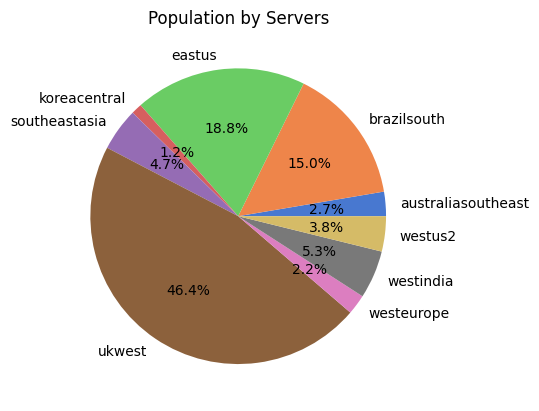

In [ ]:
showfliers=True
plt.pie(percent_servers['percent'],
        labels=percent_servers['server'],
        autopct='%1.1f%%',
        colors = sns.color_palette('muted'))
plt.title('Population by Servers')
plt.show()

En esta parte corregimos la cantidad de parches que han habido, ya que los datos originales consideran un nuevo parche a actualizaciones menores. Reemplazando las actualizaciones por los parches a las que corresponden

In [ ]:
matches["patch"].unique()

array([39515, 37906, 41855, 35584, 43210, 40220, 40874, 36906, 36202,
       37650, 42848, 39284])

In [ ]:
matches['patch'] = matches['patch'].replace(39284, 39515)
matches['patch'] = matches['patch'].replace(37650, 37906)
matches['patch'] = matches['patch'].replace(36202, 36906)
matches['patch'] = matches['patch'].replace(40220, 40874)
matches['patch'] = matches['patch'].replace(41855, 42848)

matches["patch"].unique()

array([39515, 37906, 42848, 35584, 43210, 40874, 36906])

En el segundo gráfico buscamos analizar la duración de las partidas a lo largo de los parches. Primero estandarizamos los datos en formato de minutos, luego definimos una función que filtre los outliers del dataframe



In [ ]:
matches['duration'] = pd.to_timedelta(matches['duration'])
matches['duration_minutes'] = matches['duration'].dt.total_seconds() / 60

In [ ]:
matches['duration'].describe()

,duration
count,2990459
mean,0 days 01:45:02.906021450
std,0 days 21:52:23.834062068
min,0 days 00:00:01
25%,0 days 00:22:53
50%,0 days 00:30:32
75%,0 days 00:37:38
max,61 days 03:13:21


In [ ]:
Q1 = matches['duration_minutes'].quantile(0.25)
Q3 = matches['duration_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
def filter_duration_by_limits(df, lower_limit, upper_limit):
    return df[(df['duration_minutes'] >= lower_limit) & (df['duration_minutes'] <= upper_limit)]

duration_without_outliers= filter_duration_by_limits(matches, lower_limit, upper_limit)

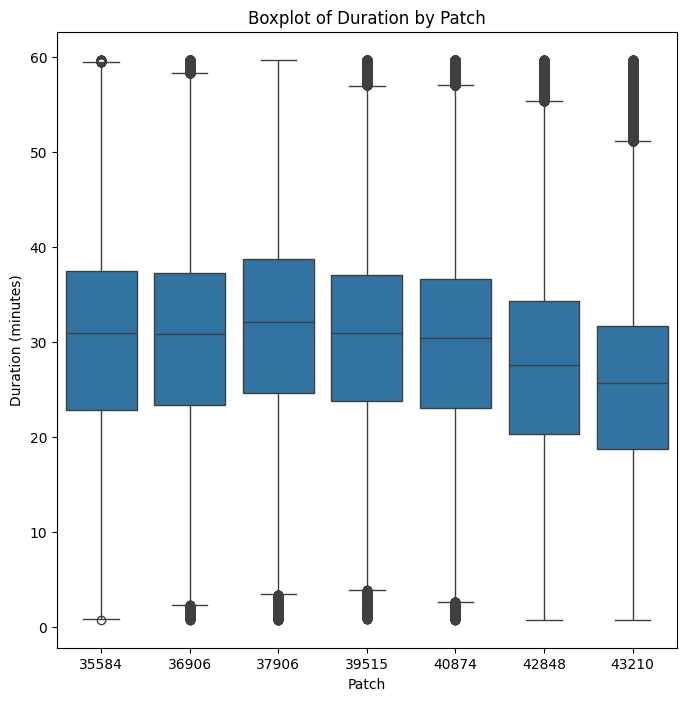

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=duration_without_outliers, x='patch', y='duration_minutes')
plt.title('Boxplot of Duration by Patch')
plt.xlabel('Patch')
plt.ylabel('Duration (minutes)')
plt.show()


Unimos nuestros dos dataframes

In [ ]:
joined_df = pd.merge(players, matches, left_on='match', right_on='token', suffixes=['_player', '_match'])

Realizamos una partición del nuevo dataframe en base al tipo de partidas. Luego definimos una función para agrupar los datos por civilizaciones utilizadas y hacer un conteo de estas y lo ordenamos de manera descendente. Graficamos los resultados para ver cuales son las civilizaciones más utilizadas

In [ ]:
match_1v1 = joined_df[joined_df['ladder'] == 'RM_1v1']
match_team = joined_df[joined_df['ladder'] == 'RM_TEAM']

In [ ]:
def get_play_rates(df):
    counts = df.groupby('civ')['token_player'].count().reset_index()
    counts['play_rate'] = counts['token_player'] / len(df)
    return counts.sort_values('play_rate', ascending=False)

groupby_comunas = get_play_rates(airbnb_comunas)
play_rate_team = get_play_rates(match_team)

<ipython-input-14-4e9186656c91>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby('civ')['token_player'].count().reset_index()
<ipython-input-14-4e9186656c91>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = df.groupby('civ')['token_player'].count().reset_index()


In [ ]:
from matplotlib.ticker import PercentFormatter

<ipython-input-16-f9e66c706622>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(play_rate_1v1['civ'], rotation=90)
<ipython-input-16-f9e66c706622>:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(play_rate_team['civ'], rotation=90)


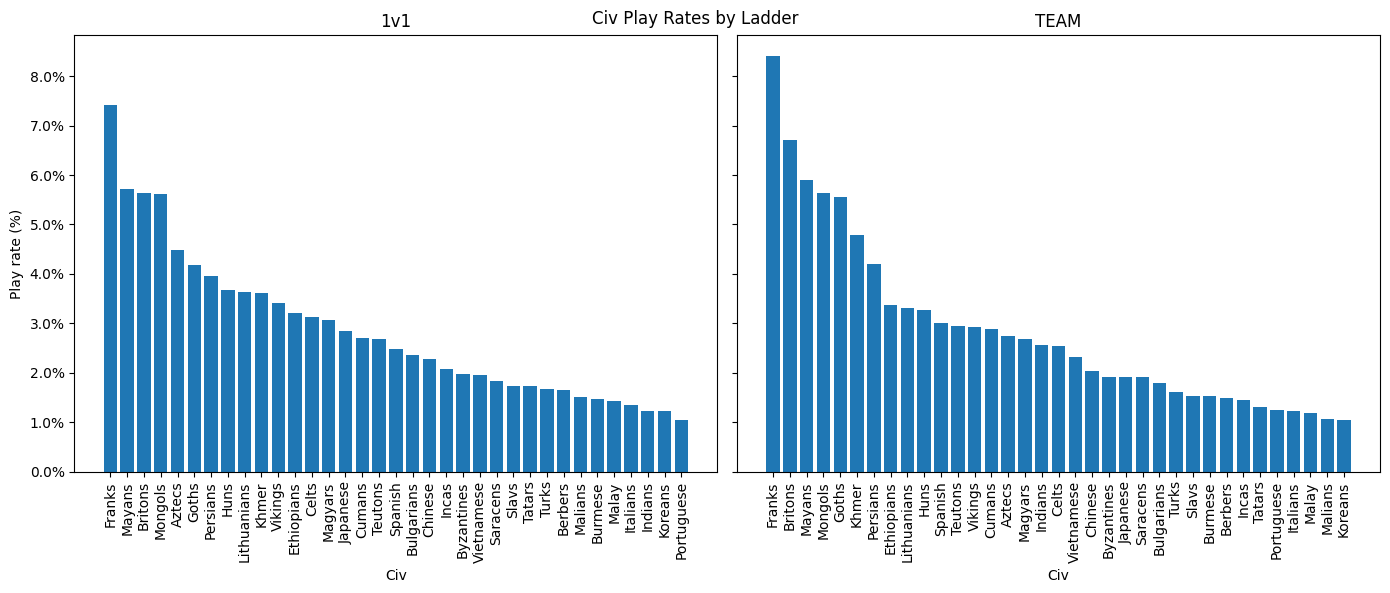

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(14, 6))

rects = ax1.bar(play_rate_1v1['civ'], play_rate_1v1['play_rate'])
ax1.set_xticklabels(play_rate_1v1['civ'], rotation=90)
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.set_title('1v1')
ax1.set_ylabel('Play rate (%)')
ax1.set_xlabel('Civ')

rects = ax2.bar(play_rate_team['civ'], play_rate_team['play_rate'])
ax2.set_xticklabels(play_rate_team['civ'], rotation=90)
ax2.set_title('TEAM')
ax2.set_xlabel('Civ')
fig.tight_layout()

fig.suptitle('Civ Play Rates by Ladder')
plt.show()

Para el próximo gráfico definimos una nueva función que agrupe los datos por civilizaciones y calcule el promedio de victorias de cada una de ellas y los ordene en forma descendente

In [ ]:
def get_win_rates(df):
    return (
        df.groupby("civ")["winner"]
            .mean()
            .reset_index()
            .rename(columns={"winner": "win_rate"})
            .sort_values("win_rate", ascending=False)
    )

win_rate_1v1 = get_win_rates(match_1v1)
win_rate_team = get_win_rates(match_team)

<ipython-input-22-4850285a2e04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("civ")["winner"]
<ipython-input-22-4850285a2e04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("civ")["winner"]


<ipython-input-33-32fbab702c56>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(win_rate_1v1['civ'], rotation=90)
<ipython-input-33-32fbab702c56>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(win_rate_team['civ'], rotation=90)


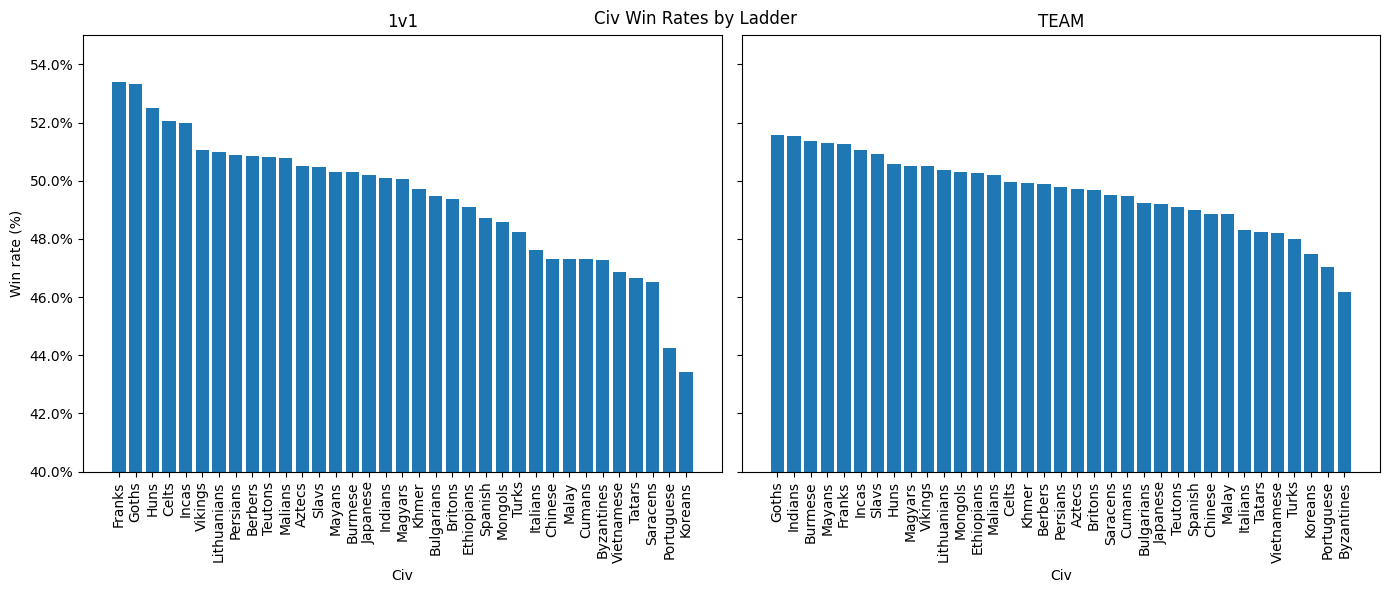

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(14, 6))

rects = ax1.bar(win_rate_1v1['civ'], win_rate_1v1['win_rate'])
ax1.set_xticklabels(win_rate_1v1['civ'], rotation=90)
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.set_title('1v1')
ax1.set_ylabel('Win rate (%)')
ax1.set_xlabel('Civ')
ax1.set_ylim(0.4, 0.55)

rects = ax2.bar(win_rate_team['civ'], win_rate_team['win_rate'])
ax2.set_xticklabels(win_rate_team['civ'], rotation=90)
ax2.set_title('TEAM')
ax2.set_xlabel('Civ')
fig.tight_layout()

fig.suptitle('Civ Win Rates by Ladder')
plt.show()

Tomamos como ejemplo a la civilización más ganadora de partidas individuales, los Francos, y realizamos un gráfico que mide su performance a lo largo de los distintos parches. Posteriormente realizamos un gráfico individual del mismo tipo para cada una de las civilizaciones

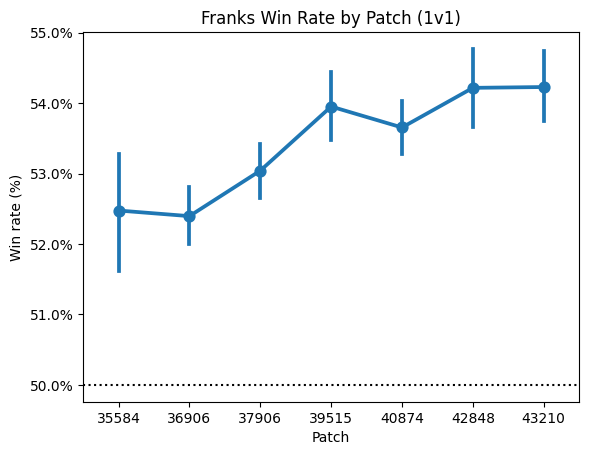

In [ ]:
ax = sns.pointplot(data=match_1v1[match_1v1['civ'] == 'Franks'], x='patch', y='winner')
ax.yaxis.set_major_formatter(PercentFormatter(1))
ax.set_xlabel('Patch')
ax.set_ylabel('Win rate (%)')
ax.axhline(y=0.5, color='black', linestyle=':')
plt.title('Franks Win Rate by Patch (1v1)')
plt.show()

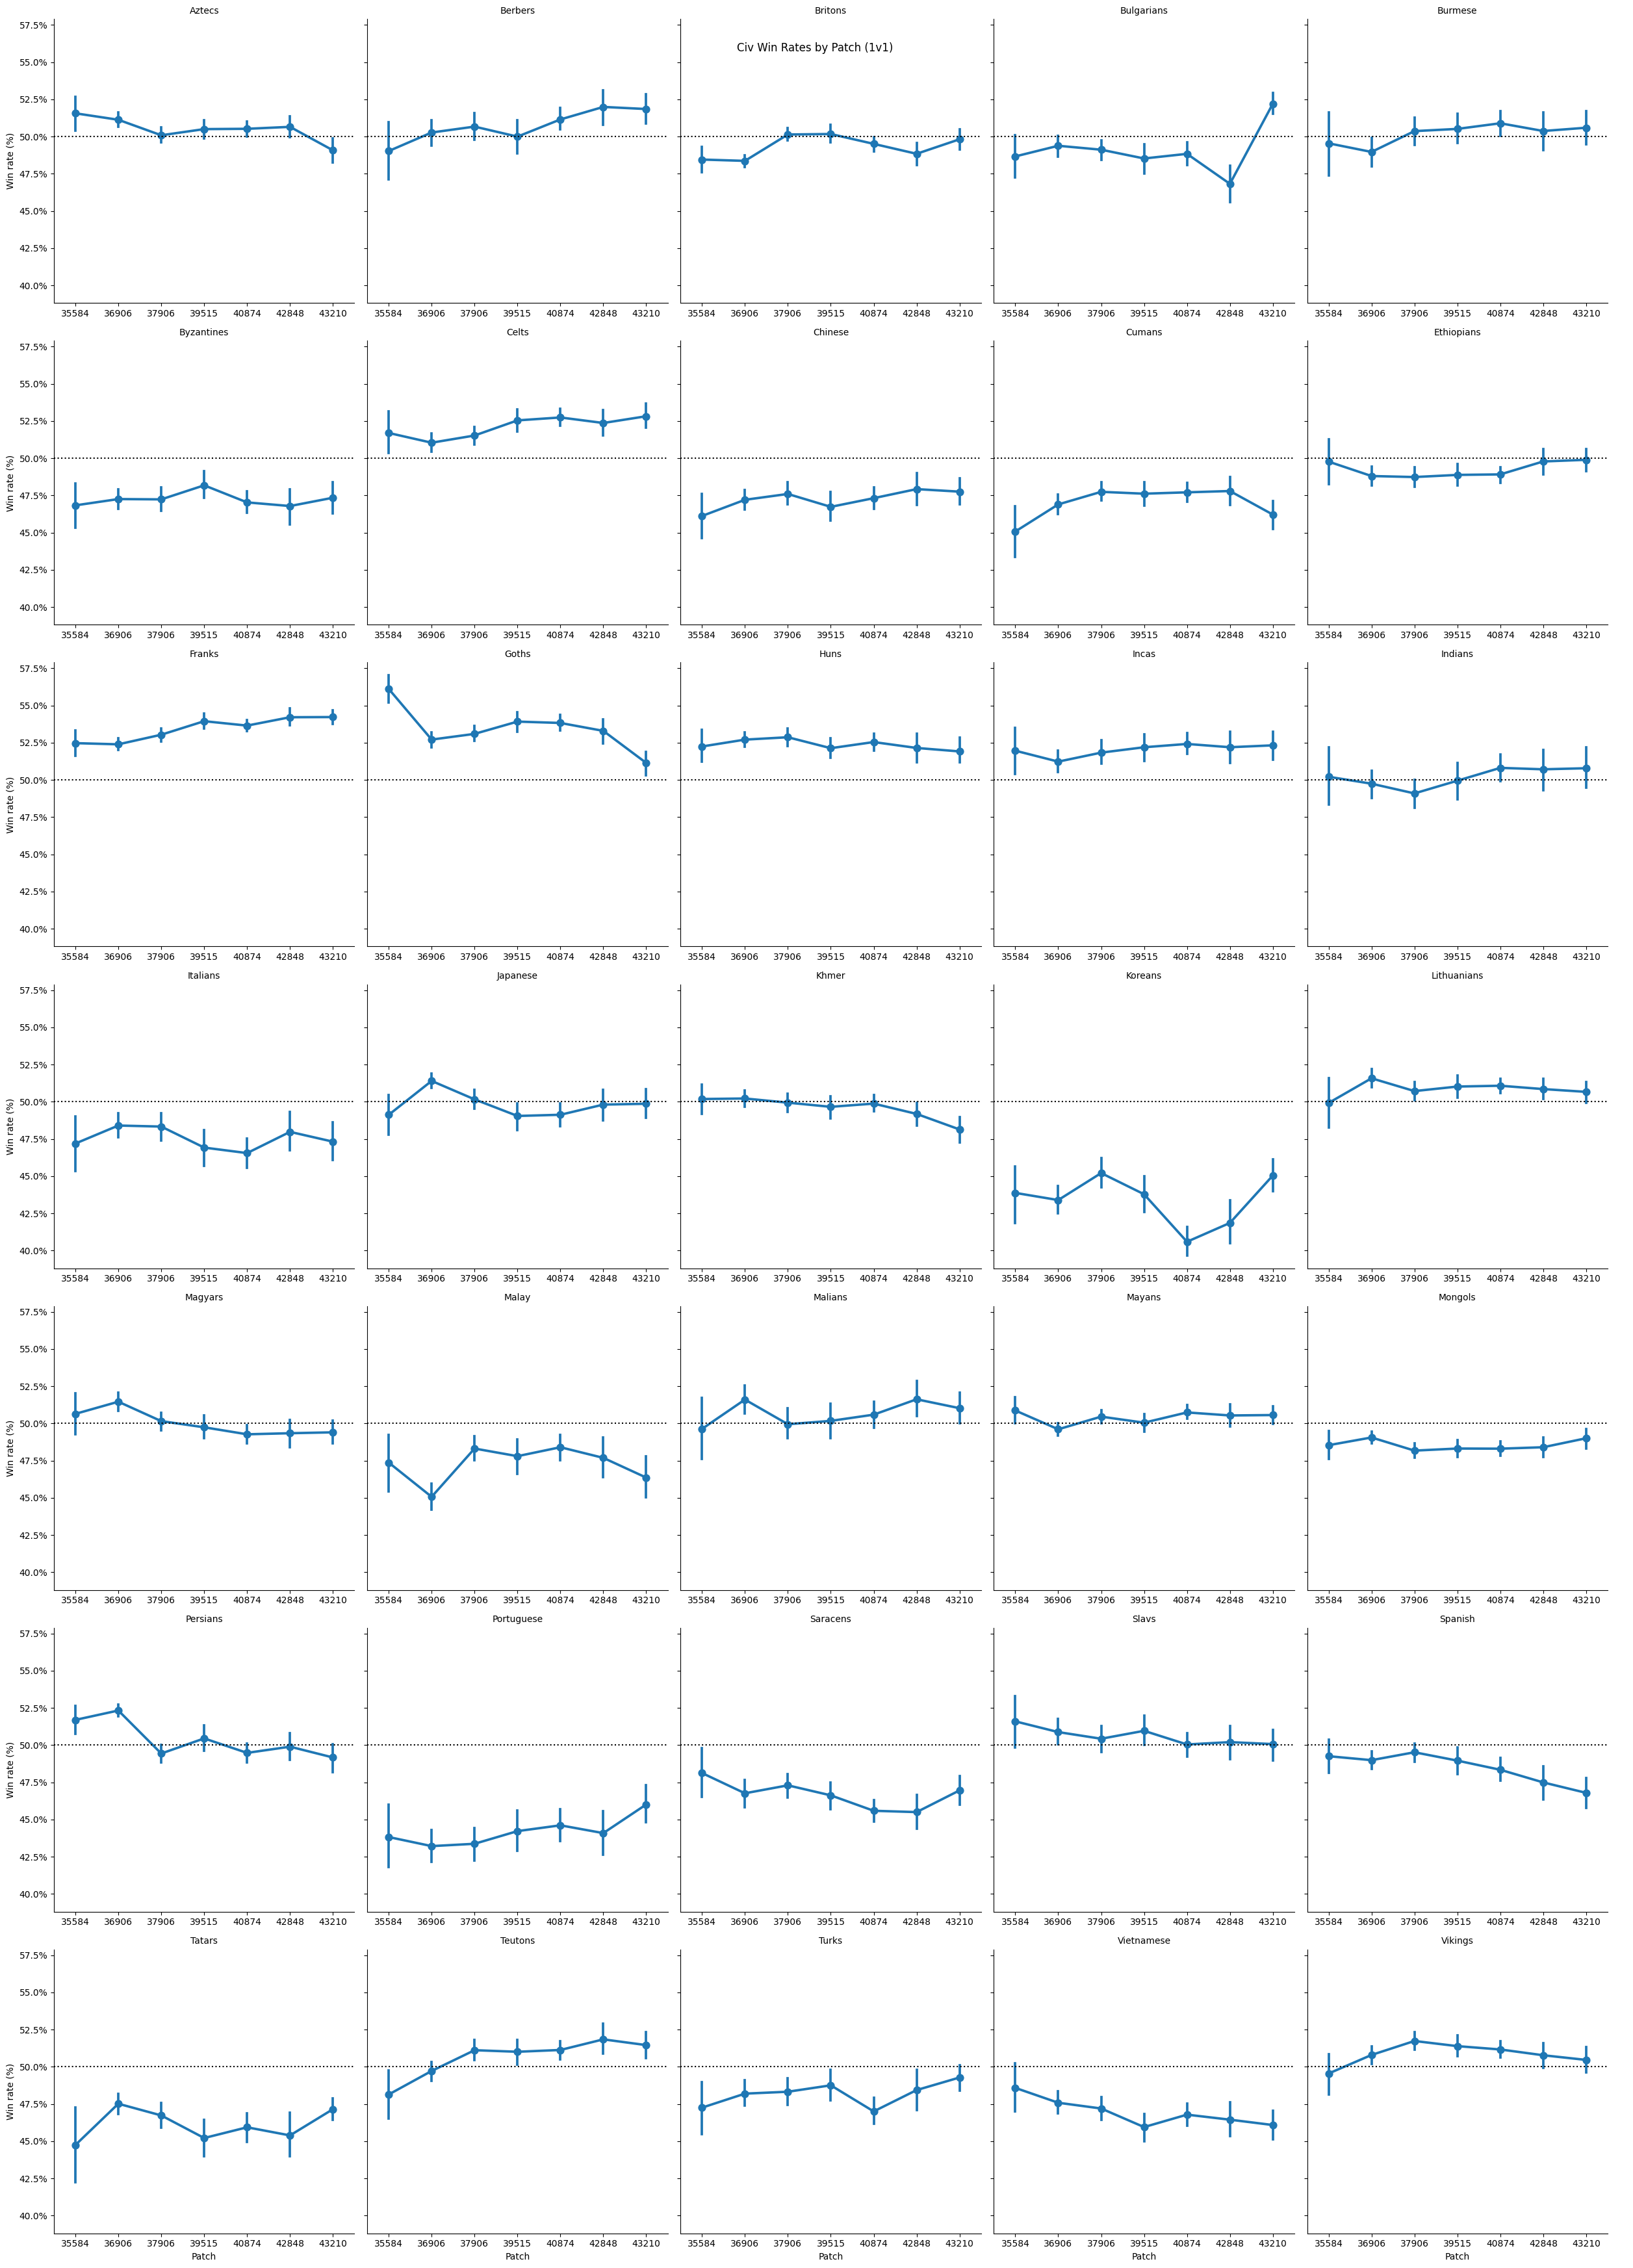

In [ ]:
g = sns.catplot(kind='point',
                data=match_1v1,
                y='winner',
                x='patch',
                col='civ',
                col_wrap=5,
                sharey=True,
                sharex=False)
for ax in g.axes:
    ax.yaxis.set_major_formatter(PercentFormatter(1))
    ax.axhline(y=0.5, color='black', linestyle=':')

g.fig.suptitle('Civ Win Rates by Patch (1v1)')
g.set_titles('{col_name}')
g.set_xlabels('Patch')
g.set_ylabels('Win rate (%)')
plt.show()

Ahora utilizamos la función para filtrar outliers en la duración en nuestro dataframe combinado, para luego realizar una división entre partidas mayores o menores de 30 minutos. Luego volvemos a usar la función de promedio de victorias para obtener un gráfico que permita analizar la diferencia entre ambas

In [ ]:
joined_df_without_outliers= filter_duration_by_limits(joined_df, lower_limit, upper_limit)

In [ ]:
long_matches = joined_df_without_outliers[joined_df_without_outliers['duration_minutes'] > 30]
short_matches = joined_df_without_outliers[joined_df_without_outliers['duration_minutes'] < 30]

In [ ]:
win_rate_long = get_win_rates(long_matches)
win_rate_short = get_win_rates(short_matches)

<ipython-input-22-4850285a2e04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("civ")["winner"]
<ipython-input-22-4850285a2e04>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("civ")["winner"]


<ipython-input-25-d4f087c5c1a6>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(win_rate_long['civ'], rotation=90)
<ipython-input-25-d4f087c5c1a6>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(win_rate_short['civ'], rotation=90)


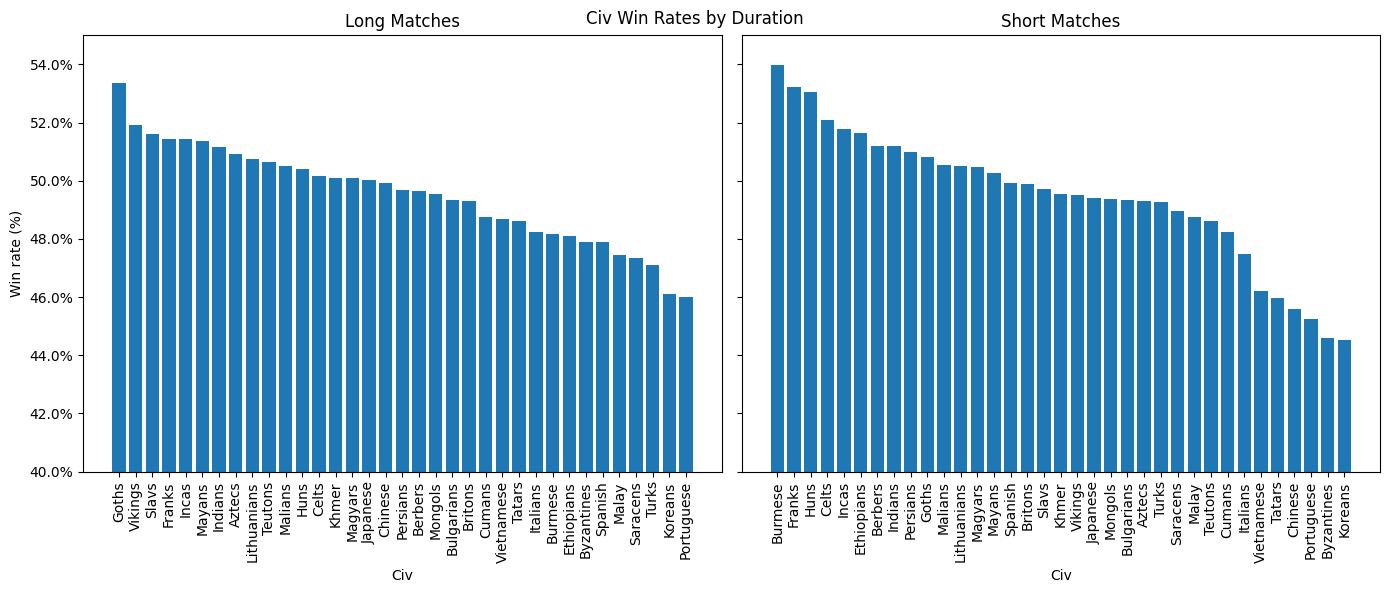

In [ ]:
fig, [ax1, ax2] = plt.subplots(ncols=2, sharey=True, figsize=(14, 6))

rects = ax1.bar(win_rate_long['civ'], win_rate_long['win_rate'])
ax1.set_xticklabels(win_rate_long['civ'], rotation=90)
ax1.yaxis.set_major_formatter(PercentFormatter(1))
ax1.set_title('Long Matches')
ax1.set_ylabel('Win rate (%)')
ax1.set_xlabel('Civ')
ax1.set_ylim(0.4, 0.55)

rects = ax2.bar(win_rate_short['civ'], win_rate_short['win_rate'])
ax2.set_xticklabels(win_rate_short['civ'], rotation=90)
ax2.set_title('Short Matches')
ax2.set_xlabel('Civ')
fig.tight_layout()

fig.suptitle('Civ Win Rates by Duration')
plt.show()

Para el último gráfico tomamos los resultados más recientes en partidas 1v1, creamos una copia de nuestro dataframe y las unimos. Luego generamos una tabla pivot entre las civilización del jugador y la de su oponente, la cual usamos para generar un mapa de calor

In [ ]:
patches = [35584, 36906, 37906, 39515, 40874, 42848, 43210]
latest_patch = patches[-1]
latest_1v1 = match_1v1[match_1v1['patch'] == latest_patch].reset_index(drop=True)

,token_player,match,rating,color,civ,team,winner,token_match,winning_team,ladder,patch,average_rating,map,map_size,num_players,server,duration,duration_minutes
0,5gxc3q9sGqxSmi2V,MPKErTOPsKnNMgHj,1096.0,Red,Goths,1,False,MPKErTOPsKnNMgHj,2,RM_1v1,43210,1105.0,arabia,tiny,2,ukwest,0 days 00:12:11,12.183333
1,y3V3jmHY70xjC4mY,MPKErTOPsKnNMgHj,1113.0,Blue,Britons,2,True,MPKErTOPsKnNMgHj,2,RM_1v1,43210,1105.0,arabia,tiny,2,ukwest,0 days 00:12:11,12.183333
2,KGzzahXknjAZ9Rfe,K9TOnX4uKFWSiASd,1711.0,Red,Britons,1,False,K9TOnX4uKFWSiASd,2,RM_1v1,43210,1678.0,arabia,tiny,2,eastus,0 days 00:18:17,18.283333
3,9aoaMyJLsbErNNCV,K9TOnX4uKFWSiASd,1645.0,Blue,Bulgarians,2,True,K9TOnX4uKFWSiASd,2,RM_1v1,43210,1678.0,arabia,tiny,2,eastus,0 days 00:18:17,18.283333
4,OFn5rnyPJnmmmbOy,WDpkY93FTZlrUTyN,1198.0,Orange,Goths,1,True,WDpkY93FTZlrUTyN,1,RM_1v1,43210,1183.0,gold_rush,tiny,2,ukwest,0 days 00:26:00,26.000000


In [ ]:
renames = {
    'token_player': 'opponent',
    'civ': 'opponent_civ',
}
opponents = latest_1v1[['match', 'token_player', 'civ']].rename(columns=renames)
vs_df = pd.merge(latest_1v1, opponents, left_on='match', right_on='match').rename(columns={'token_player': 'player'})
vs_df = vs_df[vs_df['player'] != vs_df['opponent']]
assert(len(vs_df) == len(latest_1v1))

<ipython-input-29-05d9416f1a5d>:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  win_vs = vs_df.pivot_table(values='winner', index='civ', columns='opponent_civ')


In [ ]:
win_vs = vs_df.pivot_table(values='winner', index='civ', columns='opponent_civ')

<ipython-input-30-9f61e19e8835>:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  win_vs = vs_df.pivot_table(values='winner', index='civ', columns='opponent_civ')


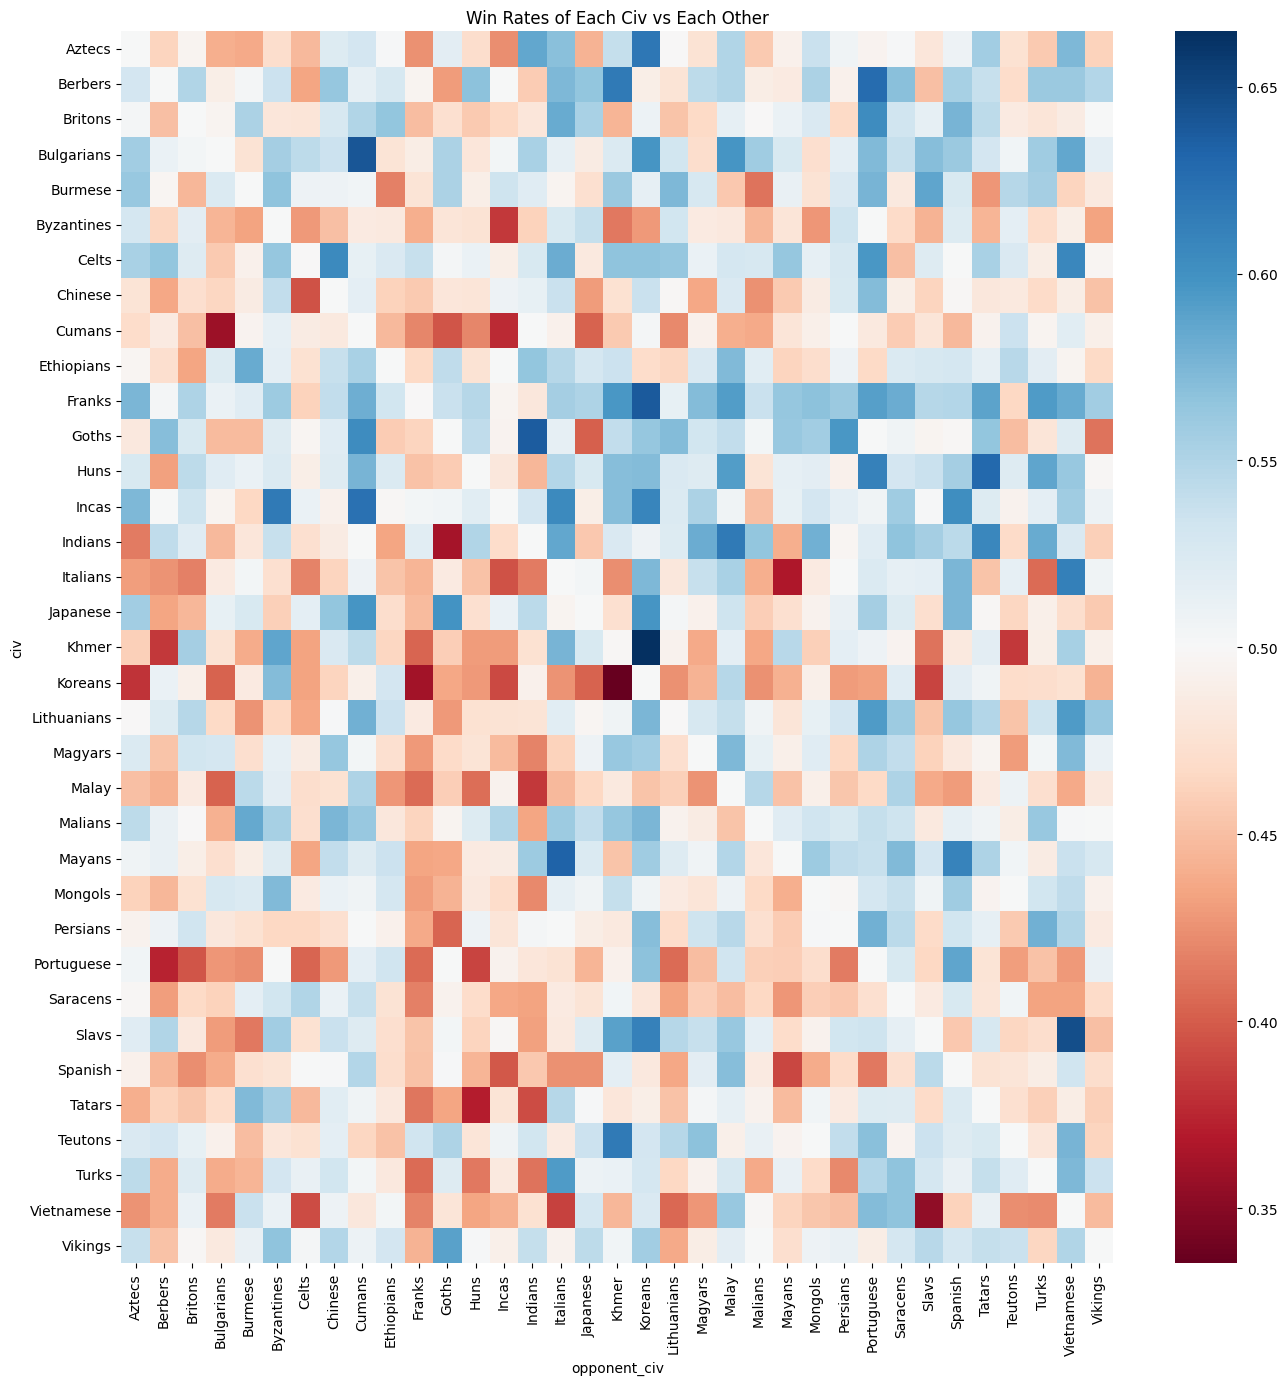

In [ ]:
win_vs = win_vs.astype(float)
plt.figure(figsize=(16, 16))

sns.heatmap(win_vs, cmap='RdBu')
plt.title('Win Rates of Each Civ vs Each Other')
plt.show()
